In [3]:
import pandas as pd

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
file = 'snow_data.txt'
file_UISC = 'snow_data_UISC.txt'
feature_conversion = 'feature_conversion.txt'
pagerank='pagerank.txt'

In [ ]:
data = pd.read_csv(wd+file_UISC, sep=' ')
data = data.merge(pd.read_csv(wd+feature_conversion, sep=' '), on='instance_id', how='left').merge(pd.read_csv(wd+pagerank, sep=' '), on='instance_id', how='left')

In [9]:
for i in data.columns:
    print(i)

context_id
context_page_id
context_timestamp
instance_id
is_trade
item_brand_id
item_category_list
item_city_id
item_collected_level
item_id
item_price_level
item_property_list
item_pv_level
item_sales_level
predict_category_property
shop_id
shop_review_num_level
shop_review_positive_rate
shop_score_delivery
shop_score_description
shop_score_service
shop_star_level
user_age_level
user_gender_id
user_id
user_occupation_id
user_star_level
len_item_category
len_item_property
item_category_list1
item_category_list2
item_property_list0
item_property_list1
item_property_list2
item_property_list3
item_property_list4
item_property_list5
item_property_list6
item_property_list7
item_property_list8
item_property_list9
gender0
age0
occupation0
star0
realtime
day
hour
len_predict_category_property
predict_category_property0
predict_category_property1
predict_category_property2
predict_category_property3
predict_category_property4
context_page0
shop_score_delivery0
hour_map
user_gender_id_user_id_cn

In [10]:
import gossipcat as gc

In [4]:
drop_list = ['item_category_list', 'item_property_list', 'predict_category_property', 'realtime', 'context_timestamp', 'Unnamed: 0']
features = [x for x in data.columns if x not in drop_list]

In [24]:
Feature = gc.Feature(data, target, features)

int_f, float_f, obj_f = Feature.classify()

classifying...
int features count: 185 
float features count: 159 
object features count: 0


In [6]:
cap_data = data[features]
cap_data.to_csv(wd+'cap_data.txt', sep=' ', index=False)

In [7]:
data = pd.read_csv(wd+file, sep=' ')
data = data.merge(pd.read_csv(wd+pagerank, sep=' '), on='instance_id', how='left')

## results 27

In [8]:
cloud_data = data[features]
cloud_data.to_csv(wd+'cloud_data.txt', sep=' ', index=False)

In [10]:
cloud_data.head()

,context_id,context_page_id,instance_id,is_trade,item_brand_id,item_city_id,item_collected_level,item_id,item_price_level,item_pv_level,...,item_price_level_shop_review_num_level_cnt,item_price_level_shop_review_num_level_prob,item_sales_level_shop_review_num_level_cnt,item_sales_level_shop_review_num_level_prob,item_collected_level_shop_review_num_level_cnt,item_collected_level_shop_review_num_level_prob,item_pv_level_shop_review_num_level_cnt,item_pv_level_shop_review_num_level_prob,user_pagerank,item_pagerank
0,282924576738839389,4006,108641074714126964,0.0,453,50,4,3804,3,14,...,24,0.088561,64,0.236162,46,0.169742,21,0.077491,0.000010,0.00002
1,4007979028023783431,4001,5754713551599725161,0.0,453,50,4,3804,3,14,...,24,0.088561,64,0.236162,46,0.169742,21,0.077491,0.000010,0.00002
2,4884875192608989870,4001,842679481291040981,0.0,453,50,4,3804,3,14,...,24,0.088561,64,0.236162,46,0.169742,21,0.077491,0.000003,0.00002
3,840119421106178602,4016,937088850059189027,0.0,453,50,4,3804,3,14,...,24,0.088561,64,0.236162,46,0.169742,21,0.077491,0.000002,0.00002
4,1736769971710354684,4001,7975697065017708072,0.0,453,50,4,3804,3,14,...,24,0.088561,64,0.236162,46,0.169742,21,0.077491,0.000003,0.00002


In [33]:
y = cloud_data.is_trade
X = cloud_data.drop(columns='is_trade')

In [34]:
X.shape

(496449, 242)

In [35]:
from sklearn.preprocessing import Imputer
import numpy as np

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

X_imputed = imp.fit_transform(np.asarray(X))

In [36]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [37]:
X_imputed.head()

,context_id,context_page_id,instance_id,item_brand_id,item_city_id,item_collected_level,item_id,item_price_level,item_pv_level,item_sales_level,...,item_price_level_shop_review_num_level_cnt,item_price_level_shop_review_num_level_prob,item_sales_level_shop_review_num_level_cnt,item_sales_level_shop_review_num_level_prob,item_collected_level_shop_review_num_level_cnt,item_collected_level_shop_review_num_level_prob,item_pv_level_shop_review_num_level_cnt,item_pv_level_shop_review_num_level_prob,user_pagerank,item_pagerank
0,2.829246e+17,4006.0,1.086411e+17,453.0,50.0,4.0,3804.0,3.0,14.0,3.0,...,24.0,0.088561,64.0,0.236162,46.0,0.169742,21.0,0.077491,0.000010,0.00002
1,4.007979e+18,4001.0,5.754714e+18,453.0,50.0,4.0,3804.0,3.0,14.0,3.0,...,24.0,0.088561,64.0,0.236162,46.0,0.169742,21.0,0.077491,0.000010,0.00002
2,4.884875e+18,4001.0,8.426795e+17,453.0,50.0,4.0,3804.0,3.0,14.0,3.0,...,24.0,0.088561,64.0,0.236162,46.0,0.169742,21.0,0.077491,0.000003,0.00002
3,8.401194e+17,4016.0,9.370889e+17,453.0,50.0,4.0,3804.0,3.0,14.0,3.0,...,24.0,0.088561,64.0,0.236162,46.0,0.169742,21.0,0.077491,0.000002,0.00002
4,1.736770e+18,4001.0,7.975697e+18,453.0,50.0,4.0,3804.0,3.0,14.0,3.0,...,24.0,0.088561,64.0,0.236162,46.0,0.169742,21.0,0.077491,0.000003,0.00002


In [52]:
import pandas as pd 
import lightgbm as lgb
from sklearn.metrics import log_loss
from gossipcat import SimulatedAnneal
import warnings

warnings.filterwarnings('ignore')

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
test_file = 'round1_ijcai_18_test_a_20180301.txt'

file = 'snow_data.txt'
file_slider3 = 'snow_data_slider3.txt'
file_UISC = 'snow_data_UISC.txt'
file_cap = 'cap_data.txt'

feature_cvr = 'feature_cvr.txt'
feature_conversion = 'feature_conversion.txt'

output_file = 'result.txt'

params = {'boosting_type': 'gbdt',
          'max_depth' : 2,
          'objective': 'binary', 
          'num_leaves': 4, 
          'learning_rate': 0.01, 
          'subsample': 0.6, 
          'colsample_bytree': 0.8, 
          'metric' : 'binary_logloss'}

target = 'is_trade'
drop_list = ['is_trade']

In [53]:
gridParams = {
    'max_depth': [2, 3, 4],
    'num_leaves': [8, 16],
    'colsample_bytree' : [i / 10.0 for i in range(3, 11, 1)],
    'subsample' : [i / 10.0 for i in range(3, 11, 1)]
    }

In [ ]:
def SubmissionSimple(data, submit=False):
  features = [x for x in data.columns if x not in drop_list]

  train = data[data.is_trade.notnull()]
  test = data[data.is_trade.isnull()]

  lgb_train = train[(train['day'] >= 18) & (train['day'] < 24)]
  lgb_valid = train[(train['day'] == 24)]

  lgb_train = lgb.Dataset(lgb_train[features], lgb_train[target], free_raw_data=False)
  lgb_valid = lgb.Dataset(lgb_valid[features], lgb_valid[target], reference=lgb_train, free_raw_data=False)

  print('\ntraining...')
  gbm = lgb.train(params=params, 
                  train_set=lgb_train,
                  valid_sets=[lgb_train, lgb_valid],
                  num_boost_round=10000, 
                  early_stopping_rounds=500,
                  verbose_eval=100)

  if submit:
    print('\npredicting...')
    test['predicted_score'] = gbm.predict(test[features], num_iteration=gbm.best_iteration)
    result = test[['instance_id', 'predicted_score']]
    result = pd.DataFrame(pd.read_csv(wd+test_file, sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)
    print('\nsaving...')
    result.to_csv(wd+output_file, sep=' ', index=False)
    
  return gbm

In [55]:
from lightgbm import LGBMClassifier
from gossipcat import SimulatedAnneal

In [132]:
data = cloud_data

features = [x for x in data.columns if x not in drop_list]
train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]

target = 'is_trade'
drop_list = ['is_trade']
features = [x for x in data.columns if x not in drop_list]

gridParams = {
    'max_depth': [2, 3, 4],
    'num_leaves': [8, 16],
    'colsample_bytree' : [i / 20.0 for i in range(6, 21, 1)],
    'subsample' : [i / 20.0 for i in range(6, 21, 1)]
    }

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = -1, 
          silent = True,
          random_state = 0,
          max_depth = params['max_depth'],
          num_leaves = params['num_leaves'], 
          colsample_bytree = params['colsample_bytree'],
          subsample = params['subsample'])

sim = SimulatedAnneal(mdl, gridParams,  scoring='neg_log_loss', alpha=0.75, n_trans=10, cv=4, verbose=True, random_state=0)

print('simulated annealing...')
# Run the grid
sim.fit(train[features], train[target])

# Using parameters already set above, replace in the best from the simulated annealing search
params['max_depth'] = sim.best_params_['max_depth']
params['num_leaves'] = sim.best_params_['num_leaves']
params['colsample_bytree'] = sim.best_params_['colsample_bytree']
params['subsample'] = sim.best_params_['subsample']

print('\nbest score:', '{:.6f}'.format(sim.best_score_), 
      '\nbest parameters:', str({key: '{:.3f}'.format(value) for key, value in sim.best_params_.items()}))


INFO: Number of possible iterations given cooling schedule: 400

simulated annealing...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


2 T: 10.0, score: -0.0886, std: 0.0040, params: {'max_depth': '4.00', 'num_leaves': '8.00', 'colsample_bytree': '0.55', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


3 T: 10.0, score: -0.0885, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '8.00', 'colsample_bytree': '0.50', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min finished


4 T: 10.0, score: -0.0884, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '8.00', 'colsample_bytree': '0.50', 'subsample': '0.70'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min finished


5 T: 10.0, score: -0.0884, std: 0.0040, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.50', 'subsample': '0.70'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min finished


6 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.50', 'subsample': '0.80'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


7 T: 10.0, score: -0.0890, std: 0.0039, params: {'max_depth': '2.00', 'num_leaves': '16.00', 'colsample_bytree': '0.50', 'subsample': '0.80'}
8 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.50', 'subsample': '0.80'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min finished


9 T: 10.0, score: -0.0885, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '8.00', 'colsample_bytree': '0.50', 'subsample': '0.80'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min finished


10 T: 10.0, score: -0.0884, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '8.00', 'colsample_bytree': '0.50', 'subsample': '0.95'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min finished


11 T: 10.0, score: -0.0890, std: 0.0039, params: {'max_depth': '2.00', 'num_leaves': '8.00', 'colsample_bytree': '0.50', 'subsample': '0.95'}

best score: -0.088308 
best parameters: {'max_depth': '4.000', 'num_leaves': '16.000', 'colsample_bytree': '0.500', 'subsample': '0.800'}


In [133]:
print('\npredicting...')
test['predicted_score'] = sim.best_estimator_.predict_proba(test[features])[:,1]
result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd+test_file, sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)
print('\nsaving...')
result.to_csv(wd+output_file, sep=' ', index=False)


predicting...

saving...


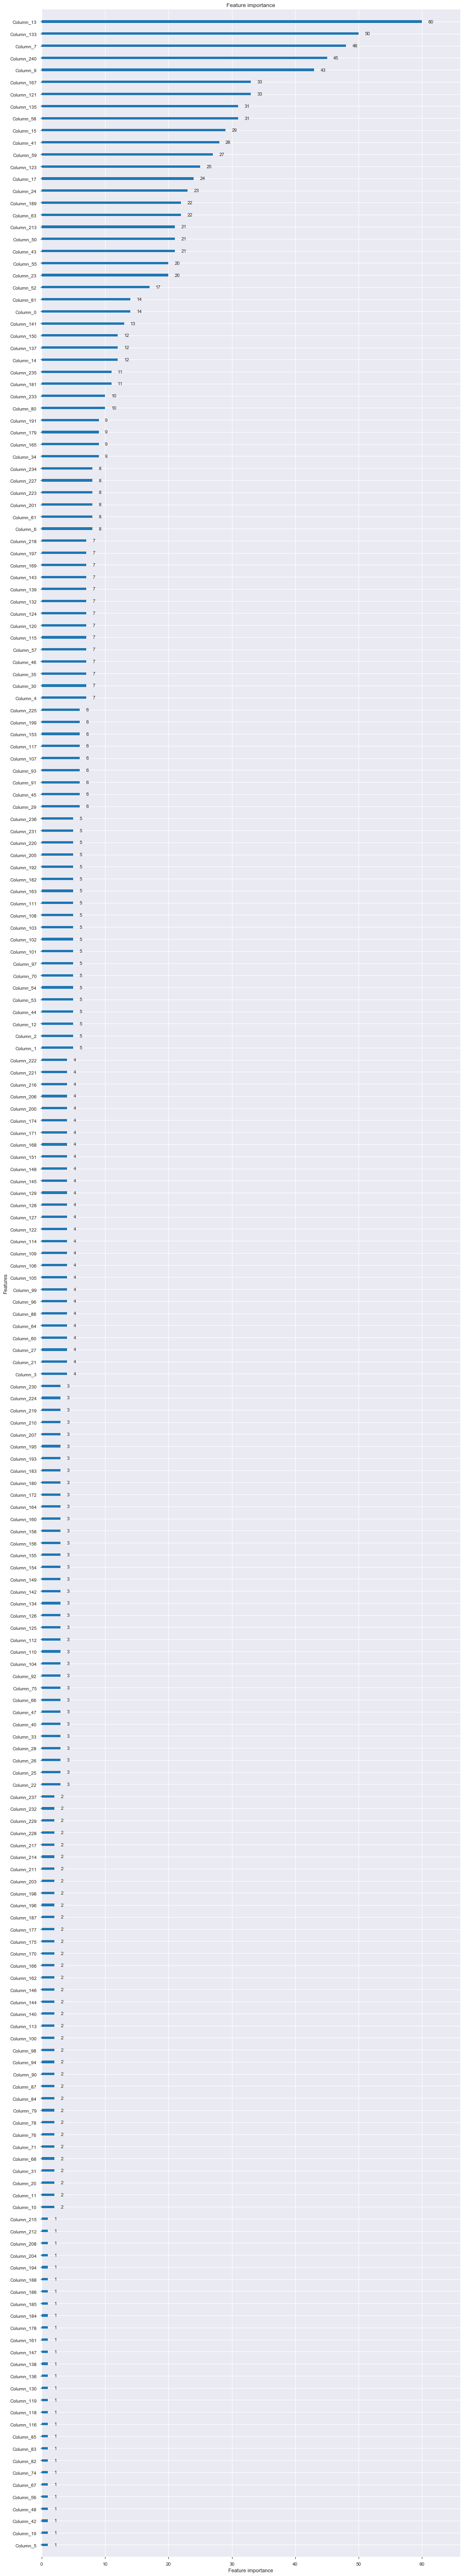

In [134]:
import lightgbm as lgb
import matplotlib.pyplot as plt

%matplotlib inline

lgb.plot_importance(sim.best_estimator_, figsize=(16,100))
plt.show()

In [135]:
for ind, col in enumerate(features):
    print(sim.best_estimator_.feature_importances_[ind], '\t', col)

14 	 context_id
5 	 context_page_id
5 	 instance_id
4 	 item_brand_id
7 	 item_city_id
1 	 item_collected_level
8 	 item_id
48 	 item_price_level
0 	 item_pv_level
43 	 item_sales_level
2 	 shop_id
2 	 shop_review_num_level
5 	 shop_review_positive_rate
60 	 shop_score_delivery
12 	 shop_score_description
29 	 shop_score_service
0 	 shop_star_level
24 	 user_age_level
0 	 user_gender_id
1 	 user_id
2 	 user_occupation_id
4 	 user_star_level
3 	 len_item_category
20 	 len_item_property
23 	 item_category_list1
3 	 item_category_list2
3 	 item_property_list0
4 	 item_property_list1
3 	 item_property_list2
6 	 item_property_list3
7 	 item_property_list4
2 	 item_property_list5
0 	 item_property_list6
3 	 item_property_list7
9 	 item_property_list8
7 	 item_property_list9
0 	 gender0
0 	 age0
0 	 occupation0
0 	 star0
3 	 day
28 	 hour
1 	 len_predict_category_property
21 	 predict_category_property0
5 	 predict_category_property1
6 	 predict_category_property2
7 	 predict_category_propert

In [136]:
feature_imp = pd.DataFrame()

feature_imp['feature'] = features
feature_imp['importance'] = sim.best_estimator_.feature_importances_

In [137]:
feature_imp.sort_values(by='importance', ascending=False)

,feature,importance
13,shop_score_delivery,60
133,item_id_user_id_prob,50
7,item_price_level,48
240,user_pagerank,45
9,item_sales_level,43
121,item_collected_level_item_sales_level_prob,33
167,item_price_level_user_age_level_prob,33
135,item_brand_id_user_id_prob,31
58,sale_price,31
15,shop_score_service,29


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x190ebc710>]],
      dtype=object)

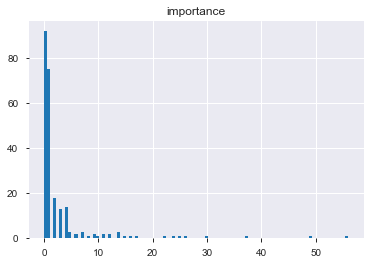

In [97]:
feature_imp.sort_values(by='importance', ascending=False).hist(bins=100)

In [138]:
drop_list = feature_imp[(feature_imp.importance < 1)]['feature'].tolist()

In [139]:
drop_list

['item_pv_level',
 'shop_star_level',
 'user_gender_id',
 'item_property_list6',
 'gender0',
 'age0',
 'occupation0',
 'star0',
 'shop_score_delivery0',
 'normal_shop',
 'gender_occ',
 'user_gender_id_user_id_prob',
 'user_occupation_id_user_id_prob',
 'user_age_level_user_gender_id_cnt',
 'user_age_level_user_gender_id_prob',
 'user_star_level_user_gender_id_prob',
 'item_price_level_item_id_cnt',
 'item_price_level_item_id_prob',
 'item_pv_level_item_id_prob',
 'shop_star_level_shop_review_num_level_prob',
 'item_price_level_user_gender_id_cnt',
 'item_collected_level_user_gender_id_prob',
 'item_pv_level_user_gender_id_prob',
 'item_pv_level_user_age_level_prob',
 'item_brand_id_user_occupation_id_cnt',
 'shop_review_num_level_user_id_cnt',
 'shop_review_num_level_user_age_level_cnt',
 'shop_review_num_level_user_occupation_id_prob',
 'item_id_shop_review_num_level_cnt',
 'item_pv_level_shop_review_num_level_cnt',
 'item_pv_level_shop_review_num_level_prob',
 'item_pagerank']

In [140]:
flower_data = cloud_data.drop(drop_list, axis=1)

In [141]:
flower_data.head()

,context_id,context_page_id,instance_id,is_trade,item_brand_id,item_city_id,item_collected_level,item_id,item_price_level,item_sales_level,...,item_brand_id_shop_review_num_level_prob,item_city_id_shop_review_num_level_cnt,item_city_id_shop_review_num_level_prob,item_price_level_shop_review_num_level_cnt,item_price_level_shop_review_num_level_prob,item_sales_level_shop_review_num_level_cnt,item_sales_level_shop_review_num_level_prob,item_collected_level_shop_review_num_level_cnt,item_collected_level_shop_review_num_level_prob,user_pagerank
0,282924576738839389,4006,108641074714126964,0.0,453,50,4,3804,3,3,...,0.055351,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000010
1,4007979028023783431,4001,5754713551599725161,0.0,453,50,4,3804,3,3,...,0.055351,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000010
2,4884875192608989870,4001,842679481291040981,0.0,453,50,4,3804,3,3,...,0.055351,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000003
3,840119421106178602,4016,937088850059189027,0.0,453,50,4,3804,3,3,...,0.055351,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000002
4,1736769971710354684,4001,7975697065017708072,0.0,453,50,4,3804,3,3,...,0.055351,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000003


In [142]:
flower_data.shape

(496449, 211)

In [143]:
flower_data.to_csv(wd+'flower_data.txt', sep=' ', index=False)

## results 28

In [145]:
data = flower_data

train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]

target = 'is_trade'
drop_list = ['is_trade']
features = [x for x in data.columns if x not in drop_list]

gridParams = {
    'max_depth': [2, 3, 4],
    'num_leaves': [8, 16],
    'colsample_bytree' : [i / 20.0 for i in range(6, 21, 1)],
    'subsample' : [i / 20.0 for i in range(6, 21, 1)]
    }

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = -1, 
          silent = True,
          random_state = 0,
          max_depth = params['max_depth'],
          num_leaves = params['num_leaves'], 
          colsample_bytree = params['colsample_bytree'],
          subsample = params['subsample'])

sim = SimulatedAnneal(mdl, gridParams,  scoring='neg_log_loss', alpha=0.75, n_trans=10, cv=4, verbose=True, random_state=0)

print('simulated annealing...')
# Run the grid
sim.fit(train[features], train[target])

# Using parameters already set above, replace in the best from the simulated annealing search
params['max_depth'] = sim.best_params_['max_depth']
params['num_leaves'] = sim.best_params_['num_leaves']
params['colsample_bytree'] = sim.best_params_['colsample_bytree']
params['subsample'] = sim.best_params_['subsample']

print('\nbest score:', '{:.6f}'.format(sim.best_score_), 
      '\nbest parameters:', str({key: '{:.3f}'.format(value) for key, value in sim.best_params_.items()}))


INFO: Number of possible iterations given cooling schedule: 400

simulated annealing...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min finished


2 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.70', 'subsample': '0.90'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min finished


3 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.75', 'subsample': '0.90'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


4 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.75', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


5 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.40', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min finished


6 T: 10.0, score: -0.0889, std: 0.0039, params: {'max_depth': '2.00', 'num_leaves': '16.00', 'colsample_bytree': '0.40', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   58.7s finished


7 T: 10.0, score: -0.0889, std: 0.0038, params: {'max_depth': '2.00', 'num_leaves': '16.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.2min finished


8 T: 10.0, score: -0.0885, std: 0.0039, params: {'max_depth': '3.00', 'num_leaves': '16.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


9 T: 10.0, score: -0.0884, std: 0.0040, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}
10 T: 10.0, score: -0.0889, std: 0.0038, params: {'max_depth': '2.00', 'num_leaves': '16.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   57.9s finished


11 T: 10.0, score: -0.0889, std: 0.0038, params: {'max_depth': '2.00', 'num_leaves': '8.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}

best score: -0.088269 
best parameters: {'max_depth': '4.000', 'num_leaves': '16.000', 'colsample_bytree': '0.700', 'subsample': '0.900'}


In [146]:
print('\npredicting...')
test['predicted_score'] = sim.best_estimator_.predict_proba(test[features])[:,1]
result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd+test_file, sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)
print('\nsaving...')
result.to_csv(wd+output_file, sep=' ', index=False)


predicting...

saving...


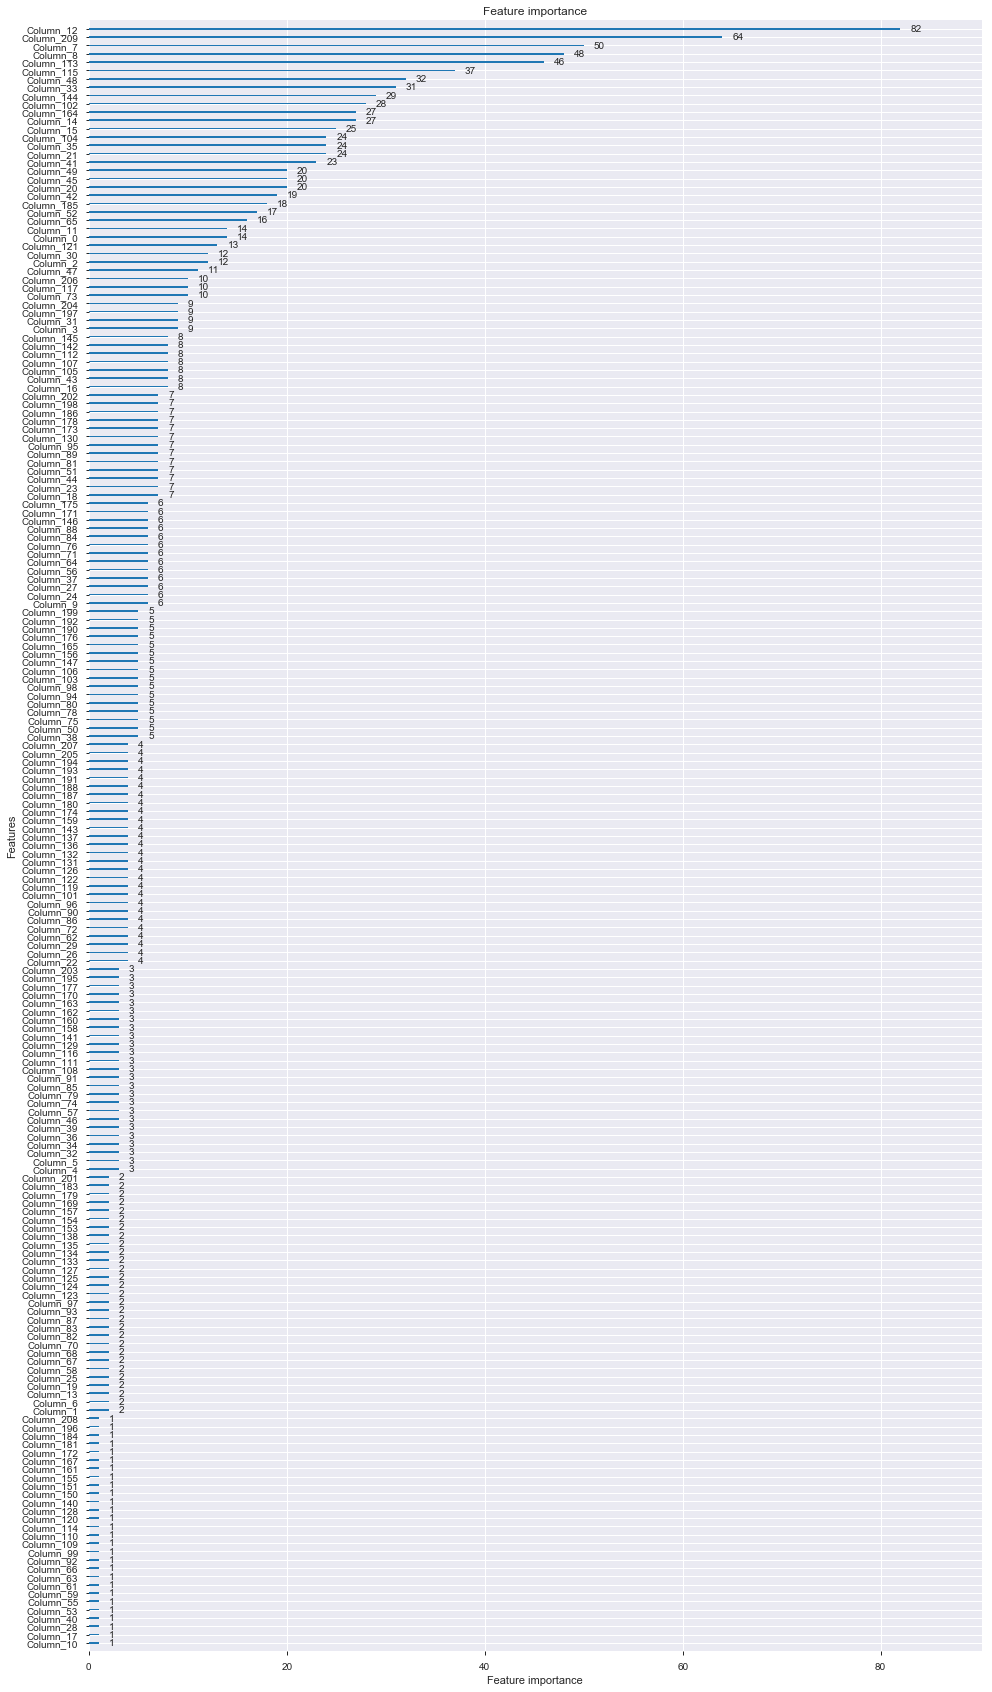

In [147]:
lgb.plot_importance(sim.best_estimator_, figsize=(16,30))
plt.show()

In [148]:
feature_imp = pd.DataFrame()

feature_imp['feature'] = features
feature_imp['importance'] = sim.best_estimator_.feature_importances_

In [149]:
feature_imp.sort_values(by='importance', ascending=False)

,feature,importance
12,shop_score_delivery,82
209,user_pagerank,64
7,item_price_level,50
8,item_sales_level,48
113,item_id_user_id_prob,46
115,item_brand_id_user_id_prob,37
48,sale_price,32
33,hour,31
144,item_price_level_user_age_level_prob,29
102,item_collected_level_item_sales_level_prob,28


In [150]:
drop_list = feature_imp[(feature_imp.importance < 1)]['feature'].tolist()

In [151]:
drop_list

['user_age_level_user_id_cnt',
 'user_occupation_id_user_gender_id_prob',
 'item_brand_id_item_id_prob',
 'item_city_id_item_brand_id_cnt',
 'item_pv_level_item_price_level_prob',
 'item_price_level_user_id_cnt',
 'item_brand_id_user_age_level_cnt',
 'item_collected_level_user_age_level_prob',
 'item_pv_level_user_age_level_cnt',
 'item_brand_id_user_occupation_id_prob',
 'shop_star_level_user_id_cnt',
 'shop_id_user_gender_id_cnt',
 'shop_star_level_user_occupation_id_cnt',
 'item_city_id_shop_id_prob',
 'item_brand_id_shop_review_num_level_prob']

In [152]:
bean_data = flower_data.drop(drop_list, axis=1)

In [153]:
bean_data.shape

(496449, 196)

In [154]:
bean_data.head()

,context_id,context_page_id,instance_id,is_trade,item_brand_id,item_city_id,item_collected_level,item_id,item_price_level,item_sales_level,...,item_brand_id_shop_review_num_level_cnt,item_city_id_shop_review_num_level_cnt,item_city_id_shop_review_num_level_prob,item_price_level_shop_review_num_level_cnt,item_price_level_shop_review_num_level_prob,item_sales_level_shop_review_num_level_cnt,item_sales_level_shop_review_num_level_prob,item_collected_level_shop_review_num_level_cnt,item_collected_level_shop_review_num_level_prob,user_pagerank
0,282924576738839389,4006,108641074714126964,0.0,453,50,4,3804,3,3,...,15,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000010
1,4007979028023783431,4001,5754713551599725161,0.0,453,50,4,3804,3,3,...,15,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000010
2,4884875192608989870,4001,842679481291040981,0.0,453,50,4,3804,3,3,...,15,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000003
3,840119421106178602,4016,937088850059189027,0.0,453,50,4,3804,3,3,...,15,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000002
4,1736769971710354684,4001,7975697065017708072,0.0,453,50,4,3804,3,3,...,15,37,0.136531,24,0.088561,64,0.236162,46,0.169742,0.000003


In [155]:
bean_data.to_csv(wd+'bean_data.txt', sep=' ', index=False)

## results 29

In [156]:
data = bean_data


INFO: Number of possible iterations given cooling schedule: 400

simulated annealing...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   55.3s finished


2 T: 10.0, score: -0.0889, std: 0.0039, params: {'max_depth': '2.00', 'num_leaves': '16.00', 'colsample_bytree': '0.65', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min finished


3 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.65', 'subsample': '0.75'}
4 T: 10.0, score: -0.0889, std: 0.0039, params: {'max_depth': '2.00', 'num_leaves': '16.00', 'colsample_bytree': '0.65', 'subsample': '0.75'}
5 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.65', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min finished


6 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.80', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min finished


7 T: 10.0, score: -0.0883, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '16.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min finished


8 T: 10.0, score: -0.0884, std: 0.0039, params: {'max_depth': '4.00', 'num_leaves': '8.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min finished


9 T: 10.0, score: -0.0884, std: 0.0039, params: {'max_depth': '3.00', 'num_leaves': '8.00', 'colsample_bytree': '0.70', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


10 T: 10.0, score: -0.0884, std: 0.0039, params: {'max_depth': '3.00', 'num_leaves': '8.00', 'colsample_bytree': '0.70', 'subsample': '0.95'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished


11 T: 10.0, score: -0.0885, std: 0.0039, params: {'max_depth': '3.00', 'num_leaves': '8.00', 'colsample_bytree': '0.35', 'subsample': '0.95'}

best score: -0.088269 
best parameters: {'max_depth': '4.000', 'num_leaves': '16.000', 'colsample_bytree': '0.700', 'subsample': '0.750'}

predicting...

saving...

plotting...


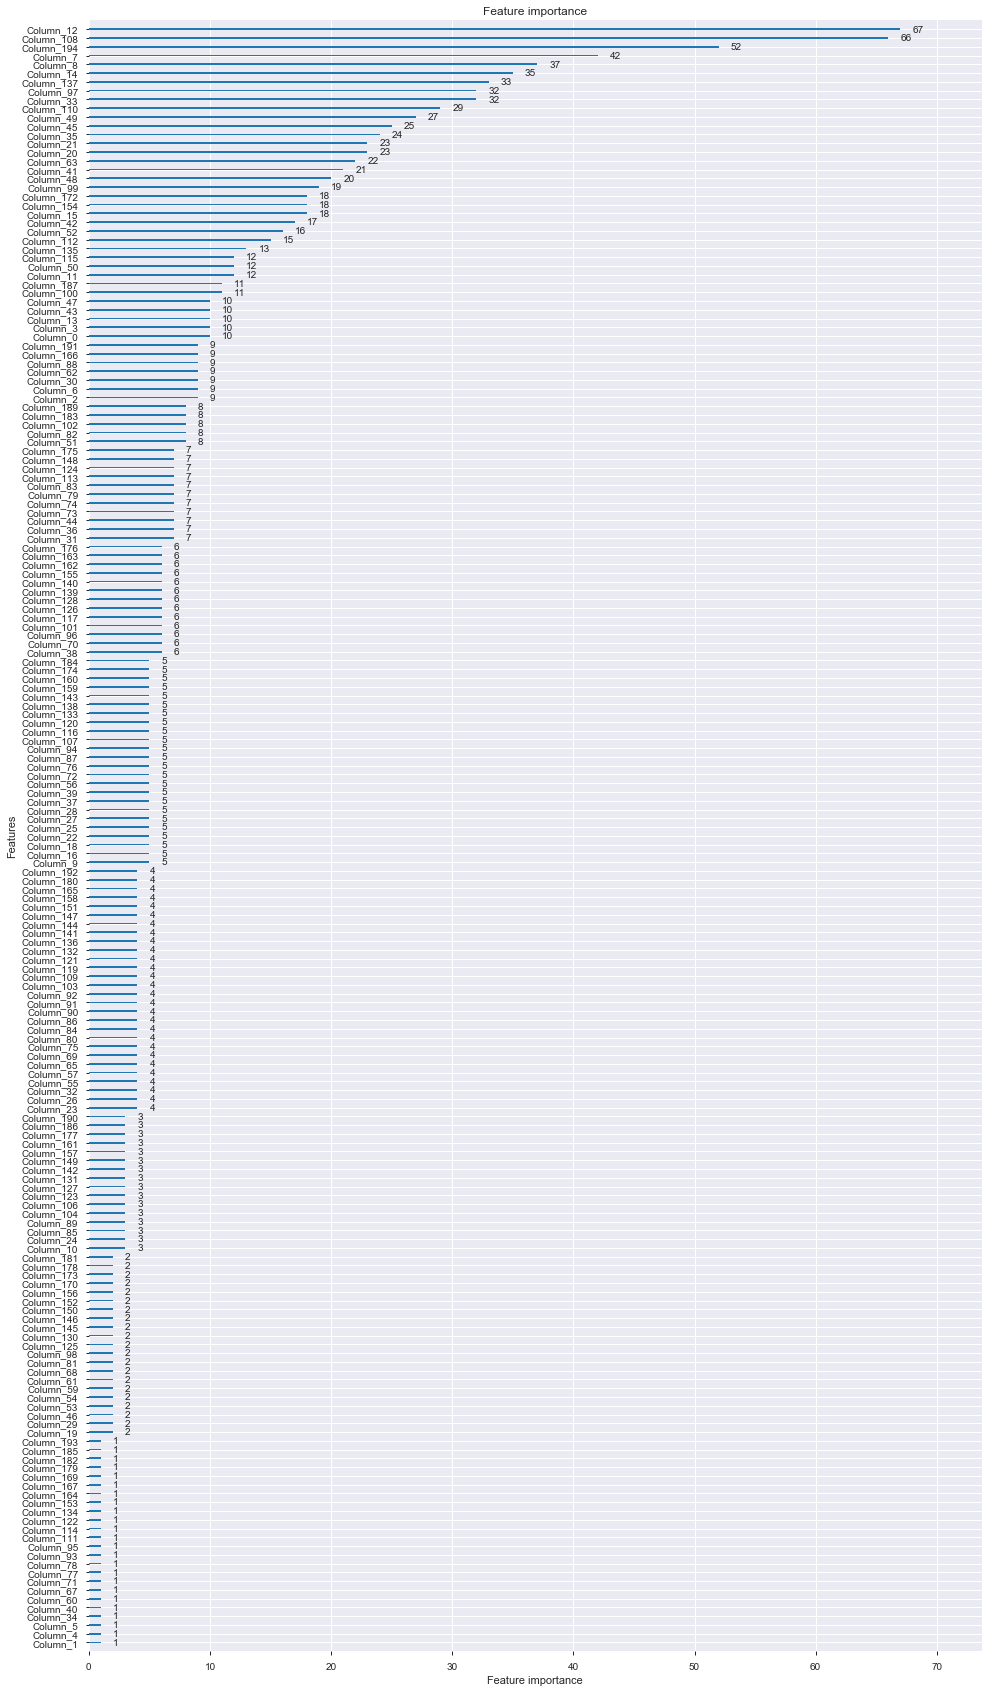

In [157]:
train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]

target = 'is_trade'
drop_list = ['is_trade']
features = [x for x in data.columns if x not in drop_list]

gridParams = {
    'max_depth': [2, 3, 4],
    'num_leaves': [8, 16],
    'colsample_bytree' : [i / 20.0 for i in range(6, 21, 1)],
    'subsample' : [i / 20.0 for i in range(6, 21, 1)]
    }

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = -1, 
          silent = True,
          random_state = 0,
          max_depth = params['max_depth'],
          num_leaves = params['num_leaves'], 
          colsample_bytree = params['colsample_bytree'],
          subsample = params['subsample'])

sim = SimulatedAnneal(mdl, gridParams,  scoring='neg_log_loss', alpha=0.75, n_trans=10, cv=4, verbose=True, random_state=0)

print('simulated annealing...')
# Run the grid
sim.fit(train[features], train[target])

# Using parameters already set above, replace in the best from the simulated annealing search
params['max_depth'] = sim.best_params_['max_depth']
params['num_leaves'] = sim.best_params_['num_leaves']
params['colsample_bytree'] = sim.best_params_['colsample_bytree']
params['subsample'] = sim.best_params_['subsample']

print('\nbest score:', '{:.6f}'.format(sim.best_score_), 
      '\nbest parameters:', str({key: '{:.3f}'.format(value) for key, value in sim.best_params_.items()}))

print('\npredicting...')
test['predicted_score'] = sim.best_estimator_.predict_proba(test[features])[:,1]
result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd+test_file, sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)
print('\nsaving...')
result.to_csv(wd+output_file, sep=' ', index=False)

print('\nplotting...')
lgb.plot_importance(sim.best_estimator_, figsize=(16,30))
plt.show()

feature_imp = pd.DataFrame()

feature_imp['feature'] = features
feature_imp['importance'] = sim.best_estimator_.feature_importances_

In [158]:
feature_imp.sort_values(by='importance', ascending=False)

,feature,importance
12,shop_score_delivery,67
108,item_id_user_id_prob,66
194,user_pagerank,52
7,item_price_level,42
8,item_sales_level,37
14,shop_score_service,35
137,item_price_level_user_age_level_prob,33
33,hour,32
97,item_collected_level_item_sales_level_prob,32
110,item_brand_id_user_id_prob,29


In [159]:
drop_list = feature_imp[(feature_imp.importance < 1)]['feature'].tolist()
drop_list

['user_occupation_id',
 'user_occupation_id_user_gender_id_cnt',
 'user_star_level_user_occupation_id_cnt',
 'item_brand_id_item_id_cnt',
 'shop_star_level_shop_id_prob',
 'item_pv_level_user_id_cnt',
 'item_collected_level_user_gender_id_cnt',
 'shop_id_user_occupation_id_prob',
 'item_id_shop_id_cnt',
 'item_price_level_shop_review_num_level_cnt']

In [160]:
tree_data = bean_data.drop(drop_list, axis=1)
print(tree_data.shape)

(496449, 186)


In [161]:
tree_data.head()

,context_id,context_page_id,instance_id,is_trade,item_brand_id,item_city_id,item_collected_level,item_id,item_price_level,item_sales_level,...,item_id_shop_review_num_level_prob,item_brand_id_shop_review_num_level_cnt,item_city_id_shop_review_num_level_cnt,item_city_id_shop_review_num_level_prob,item_price_level_shop_review_num_level_prob,item_sales_level_shop_review_num_level_cnt,item_sales_level_shop_review_num_level_prob,item_collected_level_shop_review_num_level_cnt,item_collected_level_shop_review_num_level_prob,user_pagerank
0,282924576738839389,4006,108641074714126964,0.0,453,50,4,3804,3,3,...,0.055351,15,37,0.136531,0.088561,64,0.236162,46,0.169742,0.000010
1,4007979028023783431,4001,5754713551599725161,0.0,453,50,4,3804,3,3,...,0.055351,15,37,0.136531,0.088561,64,0.236162,46,0.169742,0.000010
2,4884875192608989870,4001,842679481291040981,0.0,453,50,4,3804,3,3,...,0.055351,15,37,0.136531,0.088561,64,0.236162,46,0.169742,0.000003
3,840119421106178602,4016,937088850059189027,0.0,453,50,4,3804,3,3,...,0.055351,15,37,0.136531,0.088561,64,0.236162,46,0.169742,0.000002
4,1736769971710354684,4001,7975697065017708072,0.0,453,50,4,3804,3,3,...,0.055351,15,37,0.136531,0.088561,64,0.236162,46,0.169742,0.000003


In [162]:
tree_data.to_csv(wd+'tree_data.txt', sep=' ', index=False)

## results 30

In [4]:
cvr_sm = 'cvr_bayesianSM.txt'

data = pd.read_csv(wd+file_UISC, sep=' ')
data = data.merge(pd.read_csv(wd+cvr_sm, sep=' '), on='instance_id', how='left').merge(pd.read_csv(wd+pagerank, sep=' '), on='instance_id', how='left')

In [22]:
def Submission(data, submit=False):
    
    params = {'boosting_type': 'gbdt',
          'max_depth' : 2,
          'objective': 'binary', 
          'num_leaves': 4, 
          'learning_rate': 0.01, 
          'subsample': 0.6, 
          'colsample_bytree': 0.8, 
          'metric' : 'binary_logloss'}
    
    gridParams = {
      'max_depth': [i for i in range(3, 8, 1)],
      'colsample_bytree' : [i / 10.0 for i in range(3, 11, 1)],
      'subsample' : [i / 10.0 for i in range(6, 11, 1)]
    }
    target = 'is_trade'
    drop_list = ['is_trade', 'item_category_list', 'item_property_list', 'predict_category_property', 'realtime', 'context_timestamp', 'Unnamed: 0']
    features = [x for x in data.columns if x not in drop_list]

    if submit:
        train = data[data.is_trade.notnull()]
        test = data[data.is_trade.isnull()]
    else:
        test_day = 24
        train = data[(data['day'] >= 18) & (data['day'] < test_day)]
        test = data[(data['day'] == test_day)]

    mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
              objective = 'binary', 
              n_jobs = -1, 
              silent = True,
              random_state = 0,
              max_depth = params['max_depth'],
              colsample_bytree = params['colsample_bytree'],
              subsample = params['subsample'])

    sim = SimulatedAnneal(mdl, gridParams,  scoring='neg_log_loss', alpha=0.75, n_trans=10, cv=4, verbose=True, random_state=0)

    print('simulated annealing...')
    sim.fit(train[features], train[target])

    # Using parameters already set above, replace in the best from the simulated annealing search
    params['max_depth'] = sim.best_params_['max_depth']
    params['colsample_bytree'] = sim.best_params_['colsample_bytree']
    params['subsample'] = sim.best_params_['subsample']

    print('\nbest score:', '{:.6f}'.format(sim.best_score_), 
          '\nbest parameters:', str({key: '{:.3f}'.format(value) for key, value in sim.best_params_.items()}))

    print('predicting...')
    test['predicted_score'] = sim.best_estimator_.predict_proba(test[features])[:,1]
    
    if submit:
        result = test[['instance_id', 'predicted_score']]
        result = pd.DataFrame(pd.read_csv(wd+test_file, sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)
        print('\nsaving...')
        result.to_csv(wd+output_file, sep=' ', index=False)
    else:
        print('Log loss: ', log_loss(test['is_trade'], test['predicted_score']))   
    
    return None

In [9]:
import pandas as pd 
import lightgbm as lgb
from sklearn.metrics import log_loss
from gossipcat import SimulatedAnneal
import warnings

warnings.filterwarnings('ignore')

Submission(data)



INFO: Number of possible iterations given cooling schedule: 200

simulated annealing...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.6min finished


2 T: 10.0, score: -0.0902, std: 0.0026, params: {'max_depth': '14.00', 'colsample_bytree': '0.90', 'subsample': '0.90'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min finished


3 T: 10.0, score: -0.0895, std: 0.0024, params: {'max_depth': '4.00', 'colsample_bytree': '0.90', 'subsample': '0.90'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min finished


4 T: 10.0, score: -0.0895, std: 0.0024, params: {'max_depth': '4.00', 'colsample_bytree': '0.90', 'subsample': '0.75'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min finished


5 T: 10.0, score: -0.0895, std: 0.0024, params: {'max_depth': '4.00', 'colsample_bytree': '0.90', 'subsample': '0.80'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min finished


6 T: 10.0, score: -0.0903, std: 0.0026, params: {'max_depth': '12.00', 'colsample_bytree': '0.90', 'subsample': '0.80'}

best score: -0.089475 
best parameters: {'max_depth': '4.000', 'colsample_bytree': '0.900', 'subsample': '0.900'}
predicting...
Log loss:  0.08154126530639891


In [23]:
test_file = 'round1_ijcai_18_test_a_20180301.txt'
output_file = 'result.txt'

Submission(data, submit=True)


INFO: Number of possible iterations given cooling schedule: 400

simulated annealing...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min finished


2 T: 10.0, score: -0.0888, std: 0.0039, params: {'max_depth': '5.00', 'colsample_bytree': '0.50', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.1min finished


3 T: 10.0, score: -0.0888, std: 0.0039, params: {'max_depth': '5.00', 'colsample_bytree': '0.60', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 39.9min finished


4 T: 10.0, score: -0.0890, std: 0.0041, params: {'max_depth': '5.00', 'colsample_bytree': '0.40', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min finished


5 T: 10.0, score: -0.0889, std: 0.0041, params: {'max_depth': '4.00', 'colsample_bytree': '0.40', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min finished


6 T: 10.0, score: -0.0887, std: 0.0040, params: {'max_depth': '4.00', 'colsample_bytree': '0.80', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min finished


7 T: 10.0, score: -0.0887, std: 0.0040, params: {'max_depth': '4.00', 'colsample_bytree': '0.90', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min finished


8 T: 10.0, score: -0.0887, std: 0.0039, params: {'max_depth': '4.00', 'colsample_bytree': '0.60', 'subsample': '0.60'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min finished


9 T: 10.0, score: -0.0886, std: 0.0039, params: {'max_depth': '4.00', 'colsample_bytree': '0.60', 'subsample': '0.90'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min finished


10 T: 10.0, score: -0.0887, std: 0.0041, params: {'max_depth': '4.00', 'colsample_bytree': '0.60', 'subsample': '0.80'}


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min finished


11 T: 10.0, score: -0.0888, std: 0.0039, params: {'max_depth': '3.00', 'colsample_bytree': '0.60', 'subsample': '0.80'}

best score: -0.088633 
best parameters: {'max_depth': '4.000', 'colsample_bytree': '0.600', 'subsample': '0.900'}
predicting...

saving...


## results 31

In [28]:
train= data[(data['day'] >= 18) & (data['day'] <= 23)]
test= data[(data['day'] == 24)]

target = 'is_trade'
drop_list = ['is_trade', 'item_category_list', 'item_property_list', 'predict_category_property', 'realtime', 'context_timestamp', 'Unnamed: 0']
features = [x for x in data.columns if x not in drop_list]

X = train[features]
y = train[target].values
X_tes = test[features]
y_tes = test[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=16,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=20000,
    silent = True)

lgb_model = lgb0.fit(X, y, eval_set=[(X_tes, y_tes)], early_stopping_rounds=200)

Training LGBM model...
[1]	valid_0's binary_logloss: 0.683893
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.674824
[3]	valid_0's binary_logloss: 0.665931
[4]	valid_0's binary_logloss: 0.657211
[5]	valid_0's binary_logloss: 0.648661
[6]	valid_0's binary_logloss: 0.640271
[7]	valid_0's binary_logloss: 0.632041
[8]	valid_0's binary_logloss: 0.623962
[9]	valid_0's binary_logloss: 0.616037
[10]	valid_0's binary_logloss: 0.608257
[11]	valid_0's binary_logloss: 0.600617
[12]	valid_0's binary_logloss: 0.593117
[13]	valid_0's binary_logloss: 0.585757
[14]	valid_0's binary_logloss: 0.578527
[15]	valid_0's binary_logloss: 0.571422
[16]	valid_0's binary_logloss: 0.564445
[17]	valid_0's binary_logloss: 0.557589
[18]	valid_0's binary_logloss: 0.550855
[19]	valid_0's binary_logloss: 0.544236
[20]	valid_0's binary_logloss: 0.537731
[21]	valid_0's binary_logloss: 0.531336
[22]	valid_0's binary_logloss: 0.525049
[23]	valid_0's binary_logloss: 0.518869
[24

[202]	valid_0's binary_logloss: 0.125776
[203]	valid_0's binary_logloss: 0.12522
[204]	valid_0's binary_logloss: 0.124671
[205]	valid_0's binary_logloss: 0.124129
[206]	valid_0's binary_logloss: 0.123593
[207]	valid_0's binary_logloss: 0.123064
[208]	valid_0's binary_logloss: 0.122542
[209]	valid_0's binary_logloss: 0.122025
[210]	valid_0's binary_logloss: 0.121515
[211]	valid_0's binary_logloss: 0.121012
[212]	valid_0's binary_logloss: 0.120515
[213]	valid_0's binary_logloss: 0.120023
[214]	valid_0's binary_logloss: 0.119539
[215]	valid_0's binary_logloss: 0.119062
[216]	valid_0's binary_logloss: 0.118585
[217]	valid_0's binary_logloss: 0.118118
[218]	valid_0's binary_logloss: 0.117656
[219]	valid_0's binary_logloss: 0.117201
[220]	valid_0's binary_logloss: 0.116752
[221]	valid_0's binary_logloss: 0.11631
[222]	valid_0's binary_logloss: 0.115867
[223]	valid_0's binary_logloss: 0.115434
[224]	valid_0's binary_logloss: 0.115006
[225]	valid_0's binary_logloss: 0.114584
[226]	valid_0's bi

[400]	valid_0's binary_logloss: 0.0853601
[401]	valid_0's binary_logloss: 0.0853193
[402]	valid_0's binary_logloss: 0.0852752
[403]	valid_0's binary_logloss: 0.0852336
[404]	valid_0's binary_logloss: 0.0851909
[405]	valid_0's binary_logloss: 0.0851511
[406]	valid_0's binary_logloss: 0.0851107
[407]	valid_0's binary_logloss: 0.0850714
[408]	valid_0's binary_logloss: 0.0850368
[409]	valid_0's binary_logloss: 0.0850002
[410]	valid_0's binary_logloss: 0.0849587
[411]	valid_0's binary_logloss: 0.084924
[412]	valid_0's binary_logloss: 0.0848877
[413]	valid_0's binary_logloss: 0.0848506
[414]	valid_0's binary_logloss: 0.0848145
[415]	valid_0's binary_logloss: 0.0847793
[416]	valid_0's binary_logloss: 0.0847449
[417]	valid_0's binary_logloss: 0.0847089
[418]	valid_0's binary_logloss: 0.0846736
[419]	valid_0's binary_logloss: 0.0846391
[420]	valid_0's binary_logloss: 0.0846071
[421]	valid_0's binary_logloss: 0.0845725
[422]	valid_0's binary_logloss: 0.084534
[423]	valid_0's binary_logloss: 0.08

[596]	valid_0's binary_logloss: 0.0821277
[597]	valid_0's binary_logloss: 0.0821241
[598]	valid_0's binary_logloss: 0.0821179
[599]	valid_0's binary_logloss: 0.0821108
[600]	valid_0's binary_logloss: 0.0821069
[601]	valid_0's binary_logloss: 0.0821009
[602]	valid_0's binary_logloss: 0.0820945
[603]	valid_0's binary_logloss: 0.0820924
[604]	valid_0's binary_logloss: 0.0820895
[605]	valid_0's binary_logloss: 0.0820846
[606]	valid_0's binary_logloss: 0.0820748
[607]	valid_0's binary_logloss: 0.0820675
[608]	valid_0's binary_logloss: 0.0820604
[609]	valid_0's binary_logloss: 0.0820563
[610]	valid_0's binary_logloss: 0.0820511
[611]	valid_0's binary_logloss: 0.0820448
[612]	valid_0's binary_logloss: 0.0820392
[613]	valid_0's binary_logloss: 0.0820342
[614]	valid_0's binary_logloss: 0.0820311
[615]	valid_0's binary_logloss: 0.082027
[616]	valid_0's binary_logloss: 0.0820216
[617]	valid_0's binary_logloss: 0.082018
[618]	valid_0's binary_logloss: 0.0820143
[619]	valid_0's binary_logloss: 0.08

[792]	valid_0's binary_logloss: 0.0815695
[793]	valid_0's binary_logloss: 0.0815672
[794]	valid_0's binary_logloss: 0.0815638
[795]	valid_0's binary_logloss: 0.0815624
[796]	valid_0's binary_logloss: 0.0815597
[797]	valid_0's binary_logloss: 0.081558
[798]	valid_0's binary_logloss: 0.0815569
[799]	valid_0's binary_logloss: 0.081556
[800]	valid_0's binary_logloss: 0.0815546
[801]	valid_0's binary_logloss: 0.0815513
[802]	valid_0's binary_logloss: 0.0815499
[803]	valid_0's binary_logloss: 0.0815489
[804]	valid_0's binary_logloss: 0.0815491
[805]	valid_0's binary_logloss: 0.081549
[806]	valid_0's binary_logloss: 0.0815444
[807]	valid_0's binary_logloss: 0.0815437
[808]	valid_0's binary_logloss: 0.0815427
[809]	valid_0's binary_logloss: 0.0815422
[810]	valid_0's binary_logloss: 0.081541
[811]	valid_0's binary_logloss: 0.0815388
[812]	valid_0's binary_logloss: 0.0815371
[813]	valid_0's binary_logloss: 0.0815368
[814]	valid_0's binary_logloss: 0.0815333
[815]	valid_0's binary_logloss: 0.0815

[988]	valid_0's binary_logloss: 0.081377
[989]	valid_0's binary_logloss: 0.0813758
[990]	valid_0's binary_logloss: 0.0813763
[991]	valid_0's binary_logloss: 0.0813759
[992]	valid_0's binary_logloss: 0.0813764
[993]	valid_0's binary_logloss: 0.0813753
[994]	valid_0's binary_logloss: 0.0813729
[995]	valid_0's binary_logloss: 0.0813734
[996]	valid_0's binary_logloss: 0.0813725
[997]	valid_0's binary_logloss: 0.0813714
[998]	valid_0's binary_logloss: 0.0813689
[999]	valid_0's binary_logloss: 0.0813658
[1000]	valid_0's binary_logloss: 0.0813658
[1001]	valid_0's binary_logloss: 0.0813648
[1002]	valid_0's binary_logloss: 0.0813648
[1003]	valid_0's binary_logloss: 0.0813651
[1004]	valid_0's binary_logloss: 0.0813658
[1005]	valid_0's binary_logloss: 0.0813649
[1006]	valid_0's binary_logloss: 0.0813621
[1007]	valid_0's binary_logloss: 0.0813625
[1008]	valid_0's binary_logloss: 0.0813587
[1009]	valid_0's binary_logloss: 0.0813574
[1010]	valid_0's binary_logloss: 0.0813589
[1011]	valid_0's binary_

[1181]	valid_0's binary_logloss: 0.0813045
[1182]	valid_0's binary_logloss: 0.0813048
[1183]	valid_0's binary_logloss: 0.0813057
[1184]	valid_0's binary_logloss: 0.0813057
[1185]	valid_0's binary_logloss: 0.0813048
[1186]	valid_0's binary_logloss: 0.0813053
[1187]	valid_0's binary_logloss: 0.0813021
[1188]	valid_0's binary_logloss: 0.0813025
[1189]	valid_0's binary_logloss: 0.0812991
[1190]	valid_0's binary_logloss: 0.0812976
[1191]	valid_0's binary_logloss: 0.0812972
[1192]	valid_0's binary_logloss: 0.0812983
[1193]	valid_0's binary_logloss: 0.0812975
[1194]	valid_0's binary_logloss: 0.0812969
[1195]	valid_0's binary_logloss: 0.0812968
[1196]	valid_0's binary_logloss: 0.0812969
[1197]	valid_0's binary_logloss: 0.0812946
[1198]	valid_0's binary_logloss: 0.0812946
[1199]	valid_0's binary_logloss: 0.081295
[1200]	valid_0's binary_logloss: 0.0812956
[1201]	valid_0's binary_logloss: 0.0812956
[1202]	valid_0's binary_logloss: 0.0812961
[1203]	valid_0's binary_logloss: 0.0812947
[1204]	valid

[1373]	valid_0's binary_logloss: 0.0812555
[1374]	valid_0's binary_logloss: 0.081256
[1375]	valid_0's binary_logloss: 0.0812569
[1376]	valid_0's binary_logloss: 0.0812573
[1377]	valid_0's binary_logloss: 0.0812575
[1378]	valid_0's binary_logloss: 0.0812578
[1379]	valid_0's binary_logloss: 0.081257
[1380]	valid_0's binary_logloss: 0.0812558
[1381]	valid_0's binary_logloss: 0.0812557
[1382]	valid_0's binary_logloss: 0.0812541
[1383]	valid_0's binary_logloss: 0.0812542
[1384]	valid_0's binary_logloss: 0.0812524
[1385]	valid_0's binary_logloss: 0.0812517
[1386]	valid_0's binary_logloss: 0.0812522
[1387]	valid_0's binary_logloss: 0.0812519
[1388]	valid_0's binary_logloss: 0.081252
[1389]	valid_0's binary_logloss: 0.081253
[1390]	valid_0's binary_logloss: 0.0812514
[1391]	valid_0's binary_logloss: 0.0812521
[1392]	valid_0's binary_logloss: 0.0812524
[1393]	valid_0's binary_logloss: 0.0812507
[1394]	valid_0's binary_logloss: 0.0812512
[1395]	valid_0's binary_logloss: 0.0812495
[1396]	valid_0'

[1565]	valid_0's binary_logloss: 0.081214
[1566]	valid_0's binary_logloss: 0.0812135
[1567]	valid_0's binary_logloss: 0.081213
[1568]	valid_0's binary_logloss: 0.0812134
[1569]	valid_0's binary_logloss: 0.0812138
[1570]	valid_0's binary_logloss: 0.081214
[1571]	valid_0's binary_logloss: 0.0812141
[1572]	valid_0's binary_logloss: 0.081214
[1573]	valid_0's binary_logloss: 0.0812112
[1574]	valid_0's binary_logloss: 0.0812113
[1575]	valid_0's binary_logloss: 0.0812111
[1576]	valid_0's binary_logloss: 0.0812113
[1577]	valid_0's binary_logloss: 0.0812113
[1578]	valid_0's binary_logloss: 0.0812115
[1579]	valid_0's binary_logloss: 0.0812118
[1580]	valid_0's binary_logloss: 0.0812123
[1581]	valid_0's binary_logloss: 0.081213
[1582]	valid_0's binary_logloss: 0.0812126
[1583]	valid_0's binary_logloss: 0.0812133
[1584]	valid_0's binary_logloss: 0.0812138
[1585]	valid_0's binary_logloss: 0.0812138
[1586]	valid_0's binary_logloss: 0.0812144
[1587]	valid_0's binary_logloss: 0.0812153
[1588]	valid_0's

[1756]	valid_0's binary_logloss: 0.0811813
[1757]	valid_0's binary_logloss: 0.0811811
[1758]	valid_0's binary_logloss: 0.0811807
[1759]	valid_0's binary_logloss: 0.081181
[1760]	valid_0's binary_logloss: 0.0811819
[1761]	valid_0's binary_logloss: 0.0811805
[1762]	valid_0's binary_logloss: 0.0811778
[1763]	valid_0's binary_logloss: 0.0811785
[1764]	valid_0's binary_logloss: 0.0811783
[1765]	valid_0's binary_logloss: 0.0811787
[1766]	valid_0's binary_logloss: 0.0811793
[1767]	valid_0's binary_logloss: 0.08118
[1768]	valid_0's binary_logloss: 0.08118
[1769]	valid_0's binary_logloss: 0.0811805
[1770]	valid_0's binary_logloss: 0.0811791
[1771]	valid_0's binary_logloss: 0.0811799
[1772]	valid_0's binary_logloss: 0.0811801
[1773]	valid_0's binary_logloss: 0.0811807
[1774]	valid_0's binary_logloss: 0.0811806
[1775]	valid_0's binary_logloss: 0.0811825
[1776]	valid_0's binary_logloss: 0.0811834
[1777]	valid_0's binary_logloss: 0.0811845
[1778]	valid_0's binary_logloss: 0.0811851
[1779]	valid_0's

[1949]	valid_0's binary_logloss: 0.0811904
[1950]	valid_0's binary_logloss: 0.0811905
[1951]	valid_0's binary_logloss: 0.0811908
[1952]	valid_0's binary_logloss: 0.0811926
[1953]	valid_0's binary_logloss: 0.0811933
[1954]	valid_0's binary_logloss: 0.0811927
[1955]	valid_0's binary_logloss: 0.0811934
[1956]	valid_0's binary_logloss: 0.0811933
[1957]	valid_0's binary_logloss: 0.0811935
[1958]	valid_0's binary_logloss: 0.0811942
[1959]	valid_0's binary_logloss: 0.0811948
[1960]	valid_0's binary_logloss: 0.0811951
[1961]	valid_0's binary_logloss: 0.0811956
[1962]	valid_0's binary_logloss: 0.081196
Early stopping, best iteration is:
[1762]	valid_0's binary_logloss: 0.0811778


In [31]:
best_iter = lgb_model.best_iteration_
predictors = [i for i in X.columns]
feat_imp = pd.Series(lgb_model.feature_importances_, predictors).sort_values(ascending=False)

print(feat_imp)
print(feat_imp.shape)
pred = lgb_model.predict_proba(test[features])[:, 1]
test['pred'] = pred
test['index'] = range(len(test))
print('log loss ', log_loss(test['is_trade'], test['pred']))

shop_score_delivery                           690
user_pagerank                                 583
item_id_user_id_prob                          554
context_id                                    472
item_price_level                              421
predict_category_property0                    377
item_sales_level                              354
gender_star                                   344
sale_price                                    337
hour                                          327
item_collected_level_item_sales_level_prob    305
instance_id                                   299
user_cnt_1_y                                  293
item_id_trade_count                           287
item_price_level_user_age_level_prob          283
user_star_level_user_age_level_prob           280
user_id                                       278
shop_score_service                            271
hour_map_user_id_prob                         266
item_category_list1                           262


In [34]:
train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]

X = train[features]
y = train[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=32,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=best_iter,
    silent = True)

lgb_model = lgb0.fit(X, y)
predictors = [i for i in X.columns]
feat_imp = pd.Series(lgb_model.feature_importances_, predictors).sort_values(ascending=False)
print(feat_imp)
print(feat_imp.shape)

pred = lgb_model.predict_proba(test[features])[:, 1]
test['predicted_score'] = pred


result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd+test_file, sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)
print('\nsaving...')
result.to_csv(wd+output_file, sep=' ', index=False)

Training LGBM model...
context_id                                    1075
shop_score_delivery                            936
instance_id                                    916
user_pagerank                                  876
user_id                                        808
predict_category_property0                     784
item_id_user_id_prob                           734
predict_category_property3                     637
user_star_level_user_age_level_prob            627
hour                                           609
predict_category_property1                     554
gender_star                                    551
predict_category_property2                     534
len_item_property                              499
item_id_trade_count                            486
item_brand_id_user_id_prob                     476
shop_score_service                             471
shop_cnt_1_y                                   469
item_collected_level_item_sales_level_prob     454
item_pri

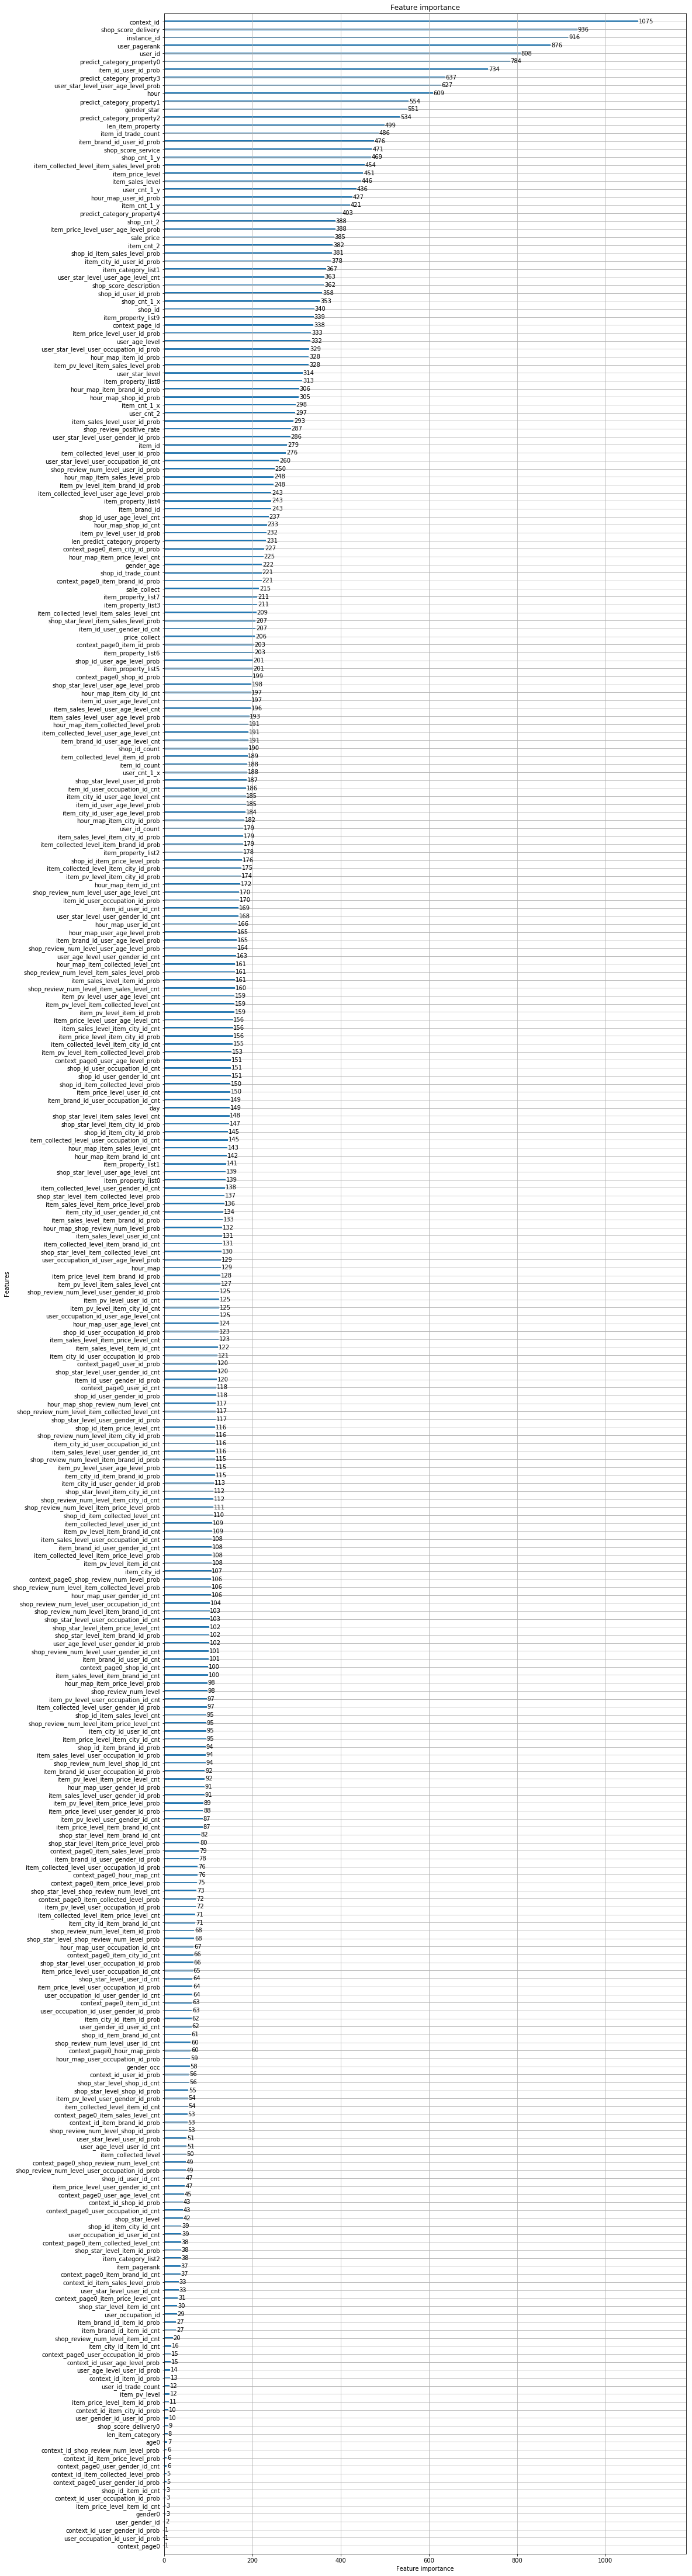

In [40]:
lgb.plot_importance(lgb_model, figsize=(16, 80))

In [35]:
from bayes_opt import BayesianOptimization
import numpy as np

test_day = 24
train = data[(data['day'] >= 18) & (data['day'] < test_day)]
test = data[(data['day'] == test_day)]
        
metric = 'binary_logloss'

target = 'is_trade'
drop_list = ['is_trade', 'item_category_list', 'item_property_list', 'predict_category_property', 'realtime', 'context_timestamp', 'Unnamed: 0']
features = [x for x in data.columns if x not in drop_list]

Dtrain = lgb.Dataset(train[features], label = train[target])

def lgb_evaluate(max_depth, colsample_bytree, subsample):

    params = {
        'eta': 0.01,
        'silent': 1,
        'num_boost_round':10000,
        'early_stopping_round':200,
        'n_fold':4,
        'verbose_eval': True,
        'seed': 0
    }

    params['max_depth'] = int(max_depth)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)   
    params['subsample'] = max(min(subsample, 1), 0)

    cv_result = lgb.cv(params, Dtrain, metrics=metric)
    if metric == 'binary_logloss':
        return -np.array(cv_result[list(cv_result.keys())[0]]).max()
    else:
        return np.array(cv_result[list(cv_result.keys())[0]]).max()

lgbBO = BayesianOptimization(lgb_evaluate, {'max_depth': (3, 8),
                                            'colsample_bytree': (0.1, 1),
                                            'subsample': (0.1, 1)})
lgbBO.maximize(init_points=5, n_iter=25)

print('\nbest score:', '{:.6f}'.format(lgbBO.res['max']['max_val']),
      '\nbest parameters:', str({key: '{:.2f}'.format(value) for key, value in lgbBO.res['max']['max_params'].items()}))

Initialization
------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |   max_depth |   subsample | 
    1 | 02m49s |   -0.09433 |             0.5549 |      3.1574 |      0.7728 | 
    2 | 02m51s |   -0.09408 |             0.7382 |      6.7196 |      0.8821 | 
    3 | 02m50s |   -0.09408 |             0.8337 |      6.1706 |      0.5072 | 
    4 | 02m42s |   -0.09411 |             0.6492 |      5.5913 |      0.3028 | 
    5 | 02m29s |   -0.09421 |             0.3040 |      4.5749 |      0.6776 | 
Bayesian Optimization
------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |   max_depth |   subsample | 
    6 | 03m00s |   -0.09408 |             0.4186 |      6.1968 |      0.2414 | 
    7 | 02m51s |   -0.09411 |             0.2559 |      5.6212 |      0.3835 | 
    8 | 03m05s |   -0.09411 |             0.6297 |      7.9784 |      0.8377 | 
    9

## results 32

In [1]:
import pandas as pd
import lightgbm as lgb

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
test_file = ['round1_ijcai_18_test_a_20180301.txt', 'round1_ijcai_18_test_b_20180418.txt', 'round2_ijcai_18_test_a_20180425.txt']

file_UISC_union = 'snow_data_UISC_union.txt'
cvr_sm_union = 'cvr_bayesianSM_union.txt'
pagerank_union = 'pagerank_union.txt'

data = pd.read_csv(wd+file_UISC_union, sep=' ')
data = data.merge(pd.read_csv(wd+pagerank_union, sep=' '), on='instance_id', how='left').merge(pd.read_csv(wd+cvr_sm_union, sep=' '), on='instance_id', how='left')

In [2]:
train= data[(data['day'] >= 18) & (data['day'] <= 23)]
test= data[(data['day'] == 24)]

target = 'is_trade'
drop_list = ['is_trade', 
             'item_category_list', 'item_property_list', 'predict_category_property', 
             'realtime', 'context_timestamp', 'Unnamed: 0']
features = [x for x in data.columns if x not in drop_list]

X = train[features]
y = train[target].values
X_tes = test[features]
y_tes = test[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=16,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=20000,
    silent = True)

lgb_model = lgb0.fit(X, y, eval_set=[(X_tes, y_tes)], early_stopping_rounds=200)

Training LGBM model...
[1]	valid_0's binary_logloss: 0.683921
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.674884
[3]	valid_0's binary_logloss: 0.66602
[4]	valid_0's binary_logloss: 0.657349
[5]	valid_0's binary_logloss: 0.648838
[6]	valid_0's binary_logloss: 0.640493
[7]	valid_0's binary_logloss: 0.632289
[8]	valid_0's binary_logloss: 0.624259
[9]	valid_0's binary_logloss: 0.616361
[10]	valid_0's binary_logloss: 0.608621
[11]	valid_0's binary_logloss: 0.601011
[12]	valid_0's binary_logloss: 0.593537
[13]	valid_0's binary_logloss: 0.58621
[14]	valid_0's binary_logloss: 0.579016
[15]	valid_0's binary_logloss: 0.57195
[16]	valid_0's binary_logloss: 0.565008
[17]	valid_0's binary_logloss: 0.558179
[18]	valid_0's binary_logloss: 0.551467
[19]	valid_0's binary_logloss: 0.544884
[20]	valid_0's binary_logloss: 0.538422
[21]	valid_0's binary_logloss: 0.532048
[22]	valid_0's binary_logloss: 0.525799
[23]	valid_0's binary_logloss: 0.519656
[24]	v

[203]	valid_0's binary_logloss: 0.128864
[204]	valid_0's binary_logloss: 0.12832
[205]	valid_0's binary_logloss: 0.127791
[206]	valid_0's binary_logloss: 0.127258
[207]	valid_0's binary_logloss: 0.126731
[208]	valid_0's binary_logloss: 0.126213
[209]	valid_0's binary_logloss: 0.125706
[210]	valid_0's binary_logloss: 0.125199
[211]	valid_0's binary_logloss: 0.124702
[212]	valid_0's binary_logloss: 0.124219
[213]	valid_0's binary_logloss: 0.123731
[214]	valid_0's binary_logloss: 0.123251
[215]	valid_0's binary_logloss: 0.122777
[216]	valid_0's binary_logloss: 0.122314
[217]	valid_0's binary_logloss: 0.121851
[218]	valid_0's binary_logloss: 0.121398
[219]	valid_0's binary_logloss: 0.120949
[220]	valid_0's binary_logloss: 0.120502
[221]	valid_0's binary_logloss: 0.120063
[222]	valid_0's binary_logloss: 0.119628
[223]	valid_0's binary_logloss: 0.119197
[224]	valid_0's binary_logloss: 0.118778
[225]	valid_0's binary_logloss: 0.118363
[226]	valid_0's binary_logloss: 0.117957
[227]	valid_0's b

[401]	valid_0's binary_logloss: 0.0895496
[402]	valid_0's binary_logloss: 0.0895066
[403]	valid_0's binary_logloss: 0.0894639
[404]	valid_0's binary_logloss: 0.0894231
[405]	valid_0's binary_logloss: 0.0893833
[406]	valid_0's binary_logloss: 0.0893439
[407]	valid_0's binary_logloss: 0.089305
[408]	valid_0's binary_logloss: 0.0892637
[409]	valid_0's binary_logloss: 0.0892273
[410]	valid_0's binary_logloss: 0.0891906
[411]	valid_0's binary_logloss: 0.0891541
[412]	valid_0's binary_logloss: 0.0891175
[413]	valid_0's binary_logloss: 0.0890793
[414]	valid_0's binary_logloss: 0.0890459
[415]	valid_0's binary_logloss: 0.0890132
[416]	valid_0's binary_logloss: 0.0889772
[417]	valid_0's binary_logloss: 0.0889431
[418]	valid_0's binary_logloss: 0.0889073
[419]	valid_0's binary_logloss: 0.0888728
[420]	valid_0's binary_logloss: 0.0888432
[421]	valid_0's binary_logloss: 0.0888115
[422]	valid_0's binary_logloss: 0.0887782
[423]	valid_0's binary_logloss: 0.0887489
[424]	valid_0's binary_logloss: 0.0

[597]	valid_0's binary_logloss: 0.0862817
[598]	valid_0's binary_logloss: 0.086278
[599]	valid_0's binary_logloss: 0.0862727
[600]	valid_0's binary_logloss: 0.0862659
[601]	valid_0's binary_logloss: 0.0862612
[602]	valid_0's binary_logloss: 0.0862559
[603]	valid_0's binary_logloss: 0.0862494
[604]	valid_0's binary_logloss: 0.0862445
[605]	valid_0's binary_logloss: 0.0862394
[606]	valid_0's binary_logloss: 0.0862338
[607]	valid_0's binary_logloss: 0.0862274
[608]	valid_0's binary_logloss: 0.0862218
[609]	valid_0's binary_logloss: 0.0862167
[610]	valid_0's binary_logloss: 0.0862158
[611]	valid_0's binary_logloss: 0.0862124
[612]	valid_0's binary_logloss: 0.0862014
[613]	valid_0's binary_logloss: 0.0861967
[614]	valid_0's binary_logloss: 0.0861923
[615]	valid_0's binary_logloss: 0.08619
[616]	valid_0's binary_logloss: 0.0861851
[617]	valid_0's binary_logloss: 0.0861791
[618]	valid_0's binary_logloss: 0.0861759
[619]	valid_0's binary_logloss: 0.0861708
[620]	valid_0's binary_logloss: 0.086

[793]	valid_0's binary_logloss: 0.0857142
[794]	valid_0's binary_logloss: 0.0857132
[795]	valid_0's binary_logloss: 0.0857123
[796]	valid_0's binary_logloss: 0.0857093
[797]	valid_0's binary_logloss: 0.0857107
[798]	valid_0's binary_logloss: 0.0857064
[799]	valid_0's binary_logloss: 0.0857067
[800]	valid_0's binary_logloss: 0.0857058
[801]	valid_0's binary_logloss: 0.0857038
[802]	valid_0's binary_logloss: 0.0857032
[803]	valid_0's binary_logloss: 0.0857047
[804]	valid_0's binary_logloss: 0.0857025
[805]	valid_0's binary_logloss: 0.0857028
[806]	valid_0's binary_logloss: 0.0857024
[807]	valid_0's binary_logloss: 0.0856962
[808]	valid_0's binary_logloss: 0.0856952
[809]	valid_0's binary_logloss: 0.0856917
[810]	valid_0's binary_logloss: 0.085689
[811]	valid_0's binary_logloss: 0.085689
[812]	valid_0's binary_logloss: 0.0856881
[813]	valid_0's binary_logloss: 0.0856871
[814]	valid_0's binary_logloss: 0.0856879
[815]	valid_0's binary_logloss: 0.0856866
[816]	valid_0's binary_logloss: 0.08

[990]	valid_0's binary_logloss: 0.0855452
[991]	valid_0's binary_logloss: 0.0855455
[992]	valid_0's binary_logloss: 0.0855475
[993]	valid_0's binary_logloss: 0.0855468
[994]	valid_0's binary_logloss: 0.0855471
[995]	valid_0's binary_logloss: 0.085546
[996]	valid_0's binary_logloss: 0.0855463
[997]	valid_0's binary_logloss: 0.0855453
[998]	valid_0's binary_logloss: 0.0855448
[999]	valid_0's binary_logloss: 0.0855456
[1000]	valid_0's binary_logloss: 0.085546
[1001]	valid_0's binary_logloss: 0.0855431
[1002]	valid_0's binary_logloss: 0.0855439
[1003]	valid_0's binary_logloss: 0.0855439
[1004]	valid_0's binary_logloss: 0.0855441
[1005]	valid_0's binary_logloss: 0.0855443
[1006]	valid_0's binary_logloss: 0.0855445
[1007]	valid_0's binary_logloss: 0.0855452
[1008]	valid_0's binary_logloss: 0.0855388
[1009]	valid_0's binary_logloss: 0.0855366
[1010]	valid_0's binary_logloss: 0.0855345
[1011]	valid_0's binary_logloss: 0.085535
[1012]	valid_0's binary_logloss: 0.0855349
[1013]	valid_0's binary_

[1182]	valid_0's binary_logloss: 0.0854597
[1183]	valid_0's binary_logloss: 0.0854605
[1184]	valid_0's binary_logloss: 0.0854612
[1185]	valid_0's binary_logloss: 0.0854552
[1186]	valid_0's binary_logloss: 0.085454
[1187]	valid_0's binary_logloss: 0.0854537
[1188]	valid_0's binary_logloss: 0.0854537
[1189]	valid_0's binary_logloss: 0.0854563
[1190]	valid_0's binary_logloss: 0.0854567
[1191]	valid_0's binary_logloss: 0.0854572
[1192]	valid_0's binary_logloss: 0.0854573
[1193]	valid_0's binary_logloss: 0.0854581
[1194]	valid_0's binary_logloss: 0.085454
[1195]	valid_0's binary_logloss: 0.0854512
[1196]	valid_0's binary_logloss: 0.0854521
[1197]	valid_0's binary_logloss: 0.0854519
[1198]	valid_0's binary_logloss: 0.0854506
[1199]	valid_0's binary_logloss: 0.0854521
[1200]	valid_0's binary_logloss: 0.0854512
[1201]	valid_0's binary_logloss: 0.0854504
[1202]	valid_0's binary_logloss: 0.085451
[1203]	valid_0's binary_logloss: 0.0854509
[1204]	valid_0's binary_logloss: 0.0854482
[1205]	valid_0

[1373]	valid_0's binary_logloss: 0.0854059
[1374]	valid_0's binary_logloss: 0.0854041
[1375]	valid_0's binary_logloss: 0.0854036
[1376]	valid_0's binary_logloss: 0.0854041
[1377]	valid_0's binary_logloss: 0.0854052
[1378]	valid_0's binary_logloss: 0.0854043
[1379]	valid_0's binary_logloss: 0.0854051
[1380]	valid_0's binary_logloss: 0.0854082
[1381]	valid_0's binary_logloss: 0.0854066
[1382]	valid_0's binary_logloss: 0.0854032
[1383]	valid_0's binary_logloss: 0.0854004
[1384]	valid_0's binary_logloss: 0.085399
[1385]	valid_0's binary_logloss: 0.0853957
[1386]	valid_0's binary_logloss: 0.0853951
[1387]	valid_0's binary_logloss: 0.0853965
[1388]	valid_0's binary_logloss: 0.0853951
[1389]	valid_0's binary_logloss: 0.0853914
[1390]	valid_0's binary_logloss: 0.0853923
[1391]	valid_0's binary_logloss: 0.0853918
[1392]	valid_0's binary_logloss: 0.0853952
[1393]	valid_0's binary_logloss: 0.0853959
[1394]	valid_0's binary_logloss: 0.0853955
[1395]	valid_0's binary_logloss: 0.0853949
[1396]	valid

[1565]	valid_0's binary_logloss: 0.0853224
[1566]	valid_0's binary_logloss: 0.0853228
[1567]	valid_0's binary_logloss: 0.0853241
[1568]	valid_0's binary_logloss: 0.0852757
[1569]	valid_0's binary_logloss: 0.0852745
[1570]	valid_0's binary_logloss: 0.0852753
[1571]	valid_0's binary_logloss: 0.0852747
[1572]	valid_0's binary_logloss: 0.0852741
[1573]	valid_0's binary_logloss: 0.0852752
[1574]	valid_0's binary_logloss: 0.0852758
[1575]	valid_0's binary_logloss: 0.085276
[1576]	valid_0's binary_logloss: 0.0852754
[1577]	valid_0's binary_logloss: 0.0852746
[1578]	valid_0's binary_logloss: 0.0852735
[1579]	valid_0's binary_logloss: 0.0852735
[1580]	valid_0's binary_logloss: 0.0852736
[1581]	valid_0's binary_logloss: 0.0852741
[1582]	valid_0's binary_logloss: 0.0852724
[1583]	valid_0's binary_logloss: 0.0852726
[1584]	valid_0's binary_logloss: 0.0852779
[1585]	valid_0's binary_logloss: 0.0852765
[1586]	valid_0's binary_logloss: 0.085274
[1587]	valid_0's binary_logloss: 0.0852747
[1588]	valid_

[1756]	valid_0's binary_logloss: 0.0852188
[1757]	valid_0's binary_logloss: 0.0852192
[1758]	valid_0's binary_logloss: 0.0852184
[1759]	valid_0's binary_logloss: 0.085222
[1760]	valid_0's binary_logloss: 0.0852231
[1761]	valid_0's binary_logloss: 0.0852226
[1762]	valid_0's binary_logloss: 0.0852234
[1763]	valid_0's binary_logloss: 0.0852244
[1764]	valid_0's binary_logloss: 0.0852239
[1765]	valid_0's binary_logloss: 0.0852235
[1766]	valid_0's binary_logloss: 0.0852278
[1767]	valid_0's binary_logloss: 0.0852293
[1768]	valid_0's binary_logloss: 0.0852303
[1769]	valid_0's binary_logloss: 0.0852307
[1770]	valid_0's binary_logloss: 0.0852315
[1771]	valid_0's binary_logloss: 0.0852316
[1772]	valid_0's binary_logloss: 0.085238
[1773]	valid_0's binary_logloss: 0.0852383
[1774]	valid_0's binary_logloss: 0.0852384
[1775]	valid_0's binary_logloss: 0.0852387
[1776]	valid_0's binary_logloss: 0.0852392
[1777]	valid_0's binary_logloss: 0.085239
[1778]	valid_0's binary_logloss: 0.0852395
[1779]	valid_0

In [3]:
from sklearn.metrics import log_loss

best_iter = lgb_model.best_iteration_
predictors = [i for i in X.columns]
feat_imp = pd.Series(lgb_model.feature_importances_, predictors).sort_values(ascending=False)

print(feat_imp)
print(feat_imp.shape)
pred = lgb_model.predict_proba(test[features])[:, 1]
test['pred'] = pred
test['index'] = range(len(test))
print('log loss ', log_loss(test['is_trade'], test['pred']))

item_id_cvr                                   835
context_id                                    552
shop_score_delivery                           476
item_id_user_id_prob                          466
user_pagerank                                 392
hour                                          362
item_price_level                              359
user_star_level_user_age_level_prob           353
predict_category_property0                    352
hour_map_user_id_prob                         314
predict_category_property3                    309
shop_id_user_id_prob                          298
instance_id                                   296
user_id                                       293
gender_star                                   267
len_item_property                             263
item_cnt_2                                    257
shop_id_item_sales_level_prob                 218
context_page_id                               217
item_price_level_user_age_level_prob          214


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [4]:
train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]

X = train[features]
y = train[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=32,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=best_iter,
    silent = True)

lgb_model = lgb0.fit(X, y)
predictors = [i for i in X.columns]
feat_imp = pd.Series(lgb_model.feature_importances_, predictors).sort_values(ascending=False)
print(feat_imp)
print(feat_imp.shape)

pred = lgb_model.predict_proba(test[features])[:, 1]
test['predicted_score'] = pred


result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd+test_file[1], sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)
print('\nsaving...')
result.to_csv(wd+output_file, sep=' ', index=False)

Training LGBM model...
item_id_cvr                             1338
context_id                              1141
instance_id                              833
shop_score_delivery                      775
user_pagerank                            734
user_id                                  714
predict_category_property0               683
predict_category_property3               643
user_star_level_user_age_level_prob      634
item_id_user_id_prob                     610
hour                                     579
hour_map_user_id_prob                    551
item_cnt_2                               536
predict_category_property1               512
predict_category_property2               493
gender_star                              480
shop_score_service                       445
item_price_level_user_age_level_prob     442
predict_category_property4               440
context_page_id                          430
item_price_level                         430
len_item_property               

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



saving...


NameError: name 'output_file' is not defined


saving...


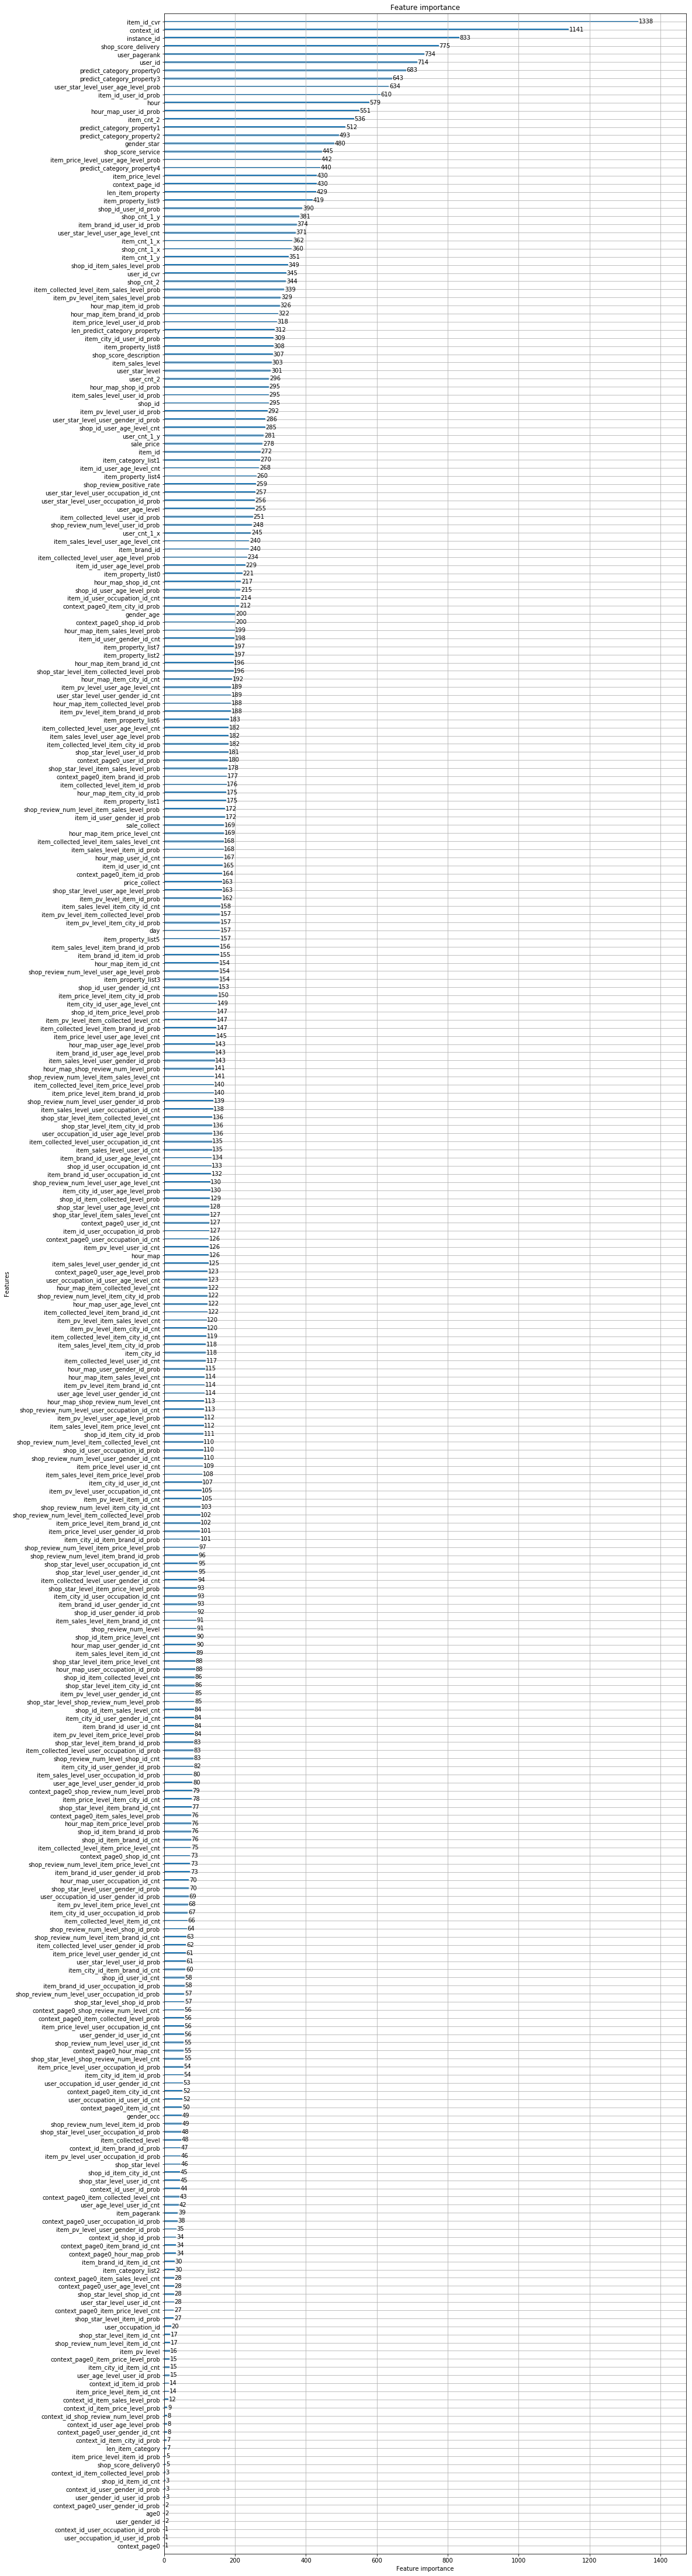

In [5]:
output_file = 'results.txt'
print('\nsaving...')
result.to_csv(wd+output_file, sep=' ', index=False)

import matplotlib.pyplot as plt
%matplotlib inline

lgb.plot_importance(lgb_model, figsize=(16, 80))